Train ML models using engineered features. Compare ML performance against Seasonal Naive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.src.losses import MeanAbsoluteError

from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

plt.style.use("seaborn-v0_8-darkgrid")

In [2]:
train_df = pd.read_csv("../results/Delhi_Hourly_train.csv")
test_df = pd.read_csv("../results/Delhi_Hourly_test.csv")

train_df

,ds,y,temp,dwpt,rhum,wdir,wspd,pres,hour,weekday,month,is_weekend,hour_sin,hour_cos,lag_1,lag_24,lag_168,rolling_mean_3,rolling_mean_24
0,2021-01-08 00:00:00,4697.857500,13.0,11.60,91.0,145.0,2.7,1014.85,0,4,1,0,0.000000,1.000000,6723.608333,6557.406667,1975.541667,6566.744722,5909.383785
1,2021-01-08 01:00:00,4430.386667,13.0,12.10,94.0,0.0,0.0,1014.00,1,4,1,0,0.258819,0.965926,4697.857500,6331.355833,1805.590000,6048.358056,5831.902569
2,2021-01-08 02:00:00,4238.806667,12.6,12.15,97.0,0.0,0.0,1014.40,2,4,1,0,0.500000,0.866025,4430.386667,6075.757500,1665.914167,5283.950833,5752.695521
3,2021-01-08 03:00:00,4055.965833,12.1,12.10,100.0,0.0,0.0,1013.90,3,4,1,0,0.707107,0.707107,4238.806667,5798.060000,1607.331667,4455.683611,5676.155903
4,2021-01-08 04:00:00,3894.686667,12.0,12.00,100.0,0.0,0.0,1013.00,4,4,1,0,0.866025,0.500000,4055.965833,5545.454167,1676.528333,4241.719722,5603.568646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27528,2024-02-29 00:00:00,2081.147500,18.0,10.35,61.0,290.0,7.6,1015.40,0,3,2,0,0.000000,1.000000,2720.321667,2053.207500,2091.685833,2785.581944,3036.565938
27529,2024-02-29 01:00:00,1917.576667,17.5,10.00,61.5,280.0,6.5,1014.50,1,3,2,0,0.258819,0.965926,2081.147500,1885.863333,1930.974167,2507.263611,3037.730104
27530,2024-02-29 02:00:00,1826.179167,16.0,10.45,70.0,255.0,6.2,1014.00,2,3,2,0,0.500000,0.866025,1917.576667,1814.252500,1843.295833,2239.681944,3039.051493
27531,2024-02-29 03:00:00,1791.240833,14.5,11.00,79.5,250.0,7.3,1014.00,3,3,2,0,0.707107,0.707107,1826.179167,1781.202500,1817.735833,1941.634444,3039.548438


In [3]:
target = "y"
features = [
    "temp",
    "dwpt",
    "rhum",
    "wdir",
    "wspd",
    "pres",
    "hour",
    "weekday",
    "month",
    "is_weekend",
    "hour_sin",
    "hour_cos",
    "lag_1",
    "lag_24",
    "lag_168",
    "rolling_mean_3",
    "rolling_mean_24"
]

X_train = train_df[features]
y_train = train_df[target]

X_test  = test_df[features]
y_test  = test_df[target]

In [4]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

LIGHTBGM -
1. Why LIGHTBGM?
   1. Handles non-linear relationships well
   2. Works well with lag features
   3. requires minimal precessing.

In [5]:
lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2754
[LightGBM] [Info] Number of data points in the train set: 27533, number of used features: 17
[LightGBM] [Info] Start training from score 3827.409329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [6]:
lgbm_pred = lgbm.predict(X_test)

In [7]:
lgbm_mae, lgbm_rmse = evaluate(y_test, lgbm_pred)
print(f"LGBM -> MAE : {lgbm_mae:.2f} and RMSE : {lgbm_rmse:.2f}")

LGBM -> MAE : 127.53 and RMSE : 274.60


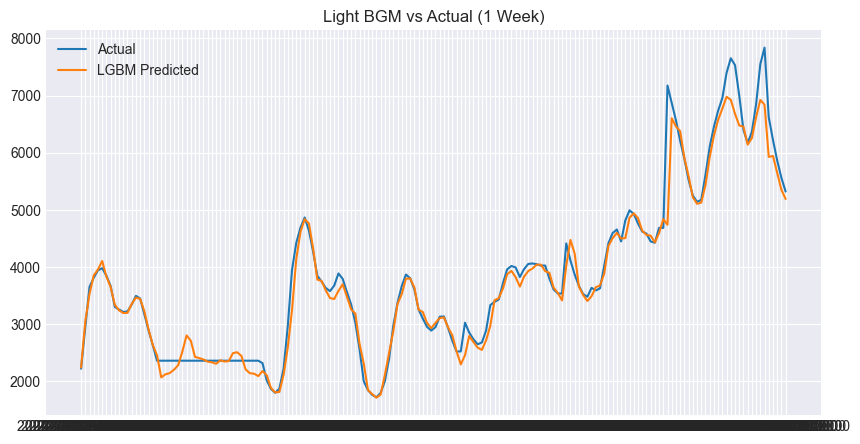

In [8]:
plt.figure(figsize=[10, 5])
plt.plot(test_df.ds[:168], y_test.values[:168], label="Actual")
plt.plot(test_df.ds[:168], lgbm_pred[:168], label="LGBM Predicted")
plt.title("Light BGM vs Actual (1 Week)")
plt.legend()
plt.show()

**Importance Feature**

In [9]:
# Feature Importance
imp = pd.DataFrame({
    "Feature" : features,
    "importance" : lgbm.feature_importances_
}).sort_values(by="importance", ascending=False)

imp

,Feature,importance
12,lag_1,2264
6,hour,2038
15,rolling_mean_3,1769
16,rolling_mean_24,1131
13,lag_24,1092
11,hour_cos,937
14,lag_168,885
0,temp,844
10,hour_sin,682
5,pres,592


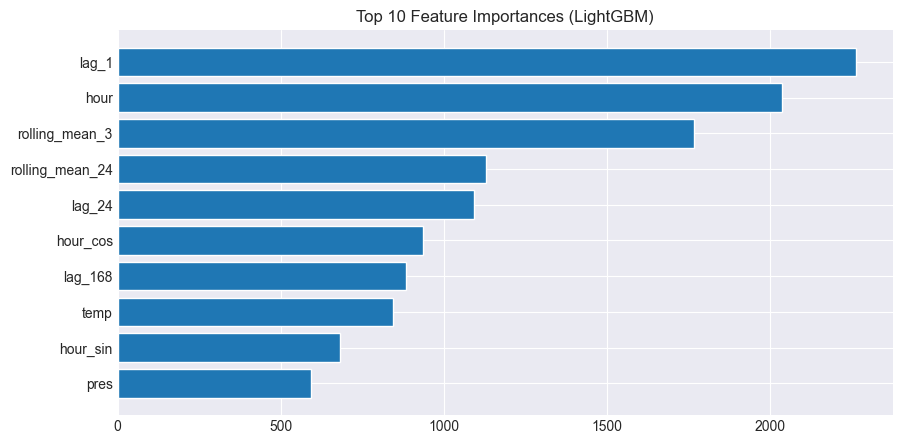

In [10]:
plt.figure(figsize=(10, 5))
plt.barh(imp.Feature[:10], imp.importance[:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (LightGBM)")
plt.show()

The LightGBM model primarily relies on short-term lagged demand and daily cyclical features, confirming that electricity demand in Delhi is driven by strong short-term inertia and daily seasonality, with weather acting as a secondary modifier.

In [11]:
results = pd.DataFrame({
    "Model" : [
        "Naive",
        "Seasonal Naive",
        "Prophet",
        "LightBGM"
    ],
    "MAE" : [
        2723.24,
        560.21,
        2527.92,
        lgbm_mae,
    ],
    "RMSE" : [
        3054.62,
        876.42,
        2870.06,
        lgbm_rmse
    ]
})
results

,Model,MAE,RMSE
0,Naive,2723.240000,3054.620000
1,Seasonal Naive,560.210000,876.420000
2,Prophet,2527.920000,2870.060000
3,LightBGM,127.530442,274.597386


In [14]:
import joblib as jb
jb.dump(lgbm, "../models/model_A_lgbm.pkl   ")
jb.dump(features, "../models/features_A_lgbm.pkl")
print("Model A saved.")

Model A saved.


In [16]:
loaded_model = jb.load("../models/model_A_lgbm.pkl")

pred_check = loaded_model.predict(X_test)
print(pred_check[:5])

[2243.03839881 3049.07004441 3532.94209351 3854.24487393 3957.13600602]
